In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

INPUT_DIR = "./data"
FILENAME = ["浦发银行", "浙江龙盛", "上证综指", "国债指数"]

In [3]:
df = pd.read_csv(os.path.join(INPUT_DIR, "month_data.csv"))
print(df.head())

rate_of_ret = {}
for filename in FILENAME:
    rate_of_ret[filename] = np.array(df[df["name"] == filename]["rate_of_ret"])

excess_income = {}
for filename in FILENAME:
    excess_income[filename] = rate_of_ret[filename] - rate_of_ret["国债指数"]

   Unnamed: 0  name     date  rate_of_ret  rate_of_ret_accumulate
0           0  浦发银行  2016-05     0.019175                0.019175
1           1  浦发银行  2016-06    -0.035748               -0.017258
2           2  浦发银行  2016-07     0.007805               -0.009588
3           3  浦发银行  2016-08     0.050339                0.040268
4           4  浦发银行  2016-09     0.000000                0.040268


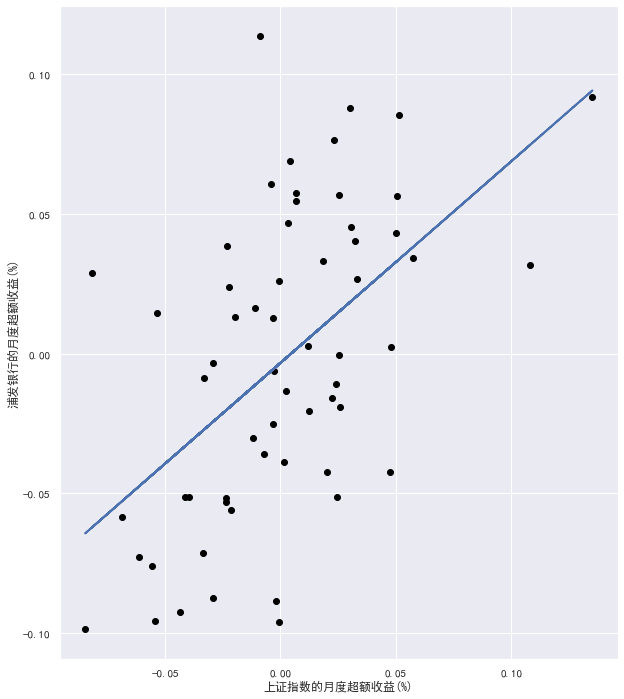

In [6]:
sns.set(font="simhei")
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(10, 12))

x = excess_income["上证综指"]
y1 = excess_income["浦发银行"]
plt.scatter(x, y1, c="black", label="散点图")
reg1 = LinearRegression().fit(x.reshape(-1, 1), y1)
pred1 = reg1.predict(x.reshape(-1, 1))
plt.plot(x, pred1, linewidth=2, label="浦发银行-SCL")

plt.xlabel("上证指数的月度超额收益(%)")
plt.ylabel("浦发银行的月度超额收益(%)")
plt.savefig("./output/CAPM_pfyh.png")

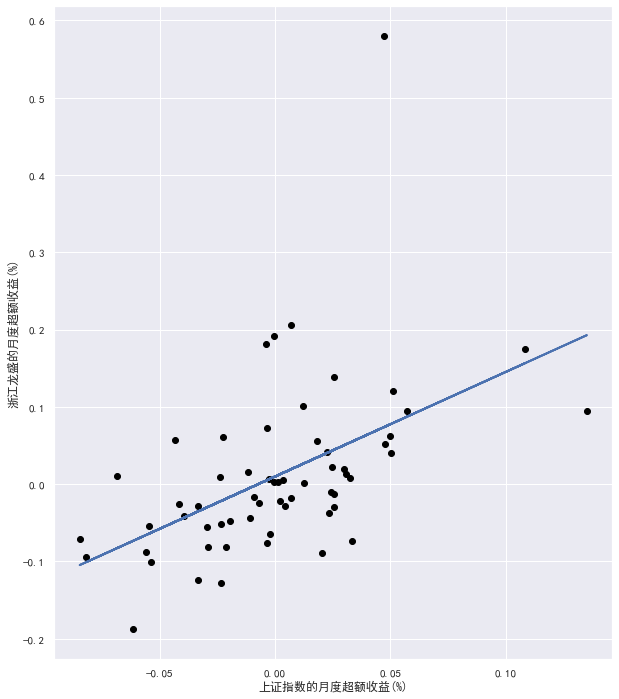

In [7]:
plt.figure(figsize=(10, 12))

x = excess_income["上证综指"]
y1 = excess_income["浙江龙盛"]
plt.scatter(x, y1, c="black", label="散点图")
reg1 = LinearRegression().fit(x.reshape(-1, 1), y1)
pred1 = reg1.predict(x.reshape(-1, 1))
plt.plot(x, pred1, linewidth=2, label="浙江龙盛-SCL")

plt.xlabel("上证指数的月度超额收益(%)")
plt.ylabel("浙江龙盛的月度超额收益(%)")
plt.savefig("./output/CAPM_zjls.png")